In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:

import keras
import scipy.io.wavfile
import tensorflow




In [ ]:
import tensorflow as tensorflow

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D


In [ ]:
get_ipython().system('pip install librosa')

In [ ]:
pip install opendatasets

'''{"username":"kavinvishnun21alr024","key":"dfc80afdf0f37f079d5b19da8cb51bca"}'''

In [ ]:
import opendatasets as od

dai=od.download('https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavinvishnun21alr024
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess


100%|██████████| 428M/428M [00:06<00:00, 70.1MB/s]


In [ ]:
dataset_dir = '/content/toronto-emotional-speech-set-tess'
paths = []
labels = []
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
paths[:5]

['/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_tough_angry.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_near_angry.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_get_angry.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_road_angry.wav',
 '/content/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_cab_angry.wav']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths

In [ ]:
df['label'] = labels
df.head()

,speech,label
0,/content/toronto-emotional-speech-set-tess/tes...,angry
1,/content/toronto-emotional-speech-set-tess/tes...,angry
2,/content/toronto-emotional-speech-set-tess/tes...,angry
3,/content/toronto-emotional-speech-set-tess/tes...,angry
4,/content/toronto-emotional-speech-set-tess/tes...,angry


In [ ]:
df.loc[df['label'] == 'ps', 'label'] = 'not-stressed'
df.loc[df['label'] == 'happy', 'label'] = 'not-stressed'
df.loc[df['label'] == 'neutral', 'label'] = 'not-stressed'
df.loc[df['label'] == 'sad', 'label'] = 'stressed'
df.loc[df['label'] == 'disgust', 'label'] = 'stressed'
df.loc[df['label'] == 'fear', 'label'] = 'stressed'
df.loc[df['label'] == 'angry', 'label'] = 'stressed'

<Axes: xlabel='count', ylabel='label'>

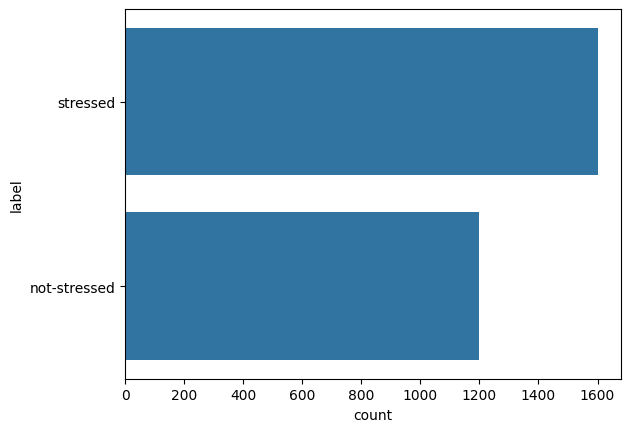

In [ ]:
sns.countplot(df['label'])

In [ ]:
df['label']

0           stressed
1           stressed
2           stressed
3           stressed
4           stressed
            ...     
2795    not-stressed
2796    not-stressed
2797    not-stressed
2798    not-stressed
2799    not-stressed
Name: label, Length: 2800, dtype: object

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

In [ ]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

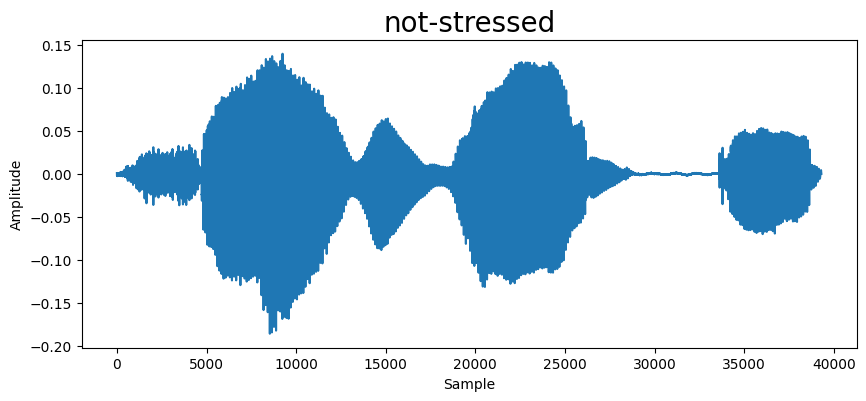

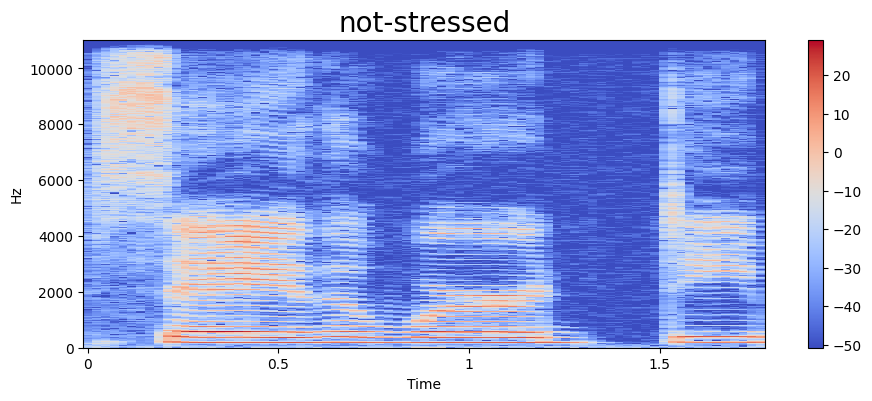

In [ ]:
emotion = 'not-stressed'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

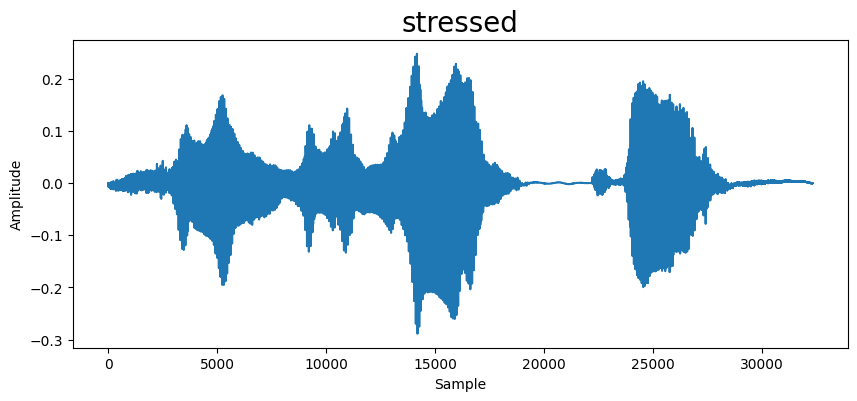

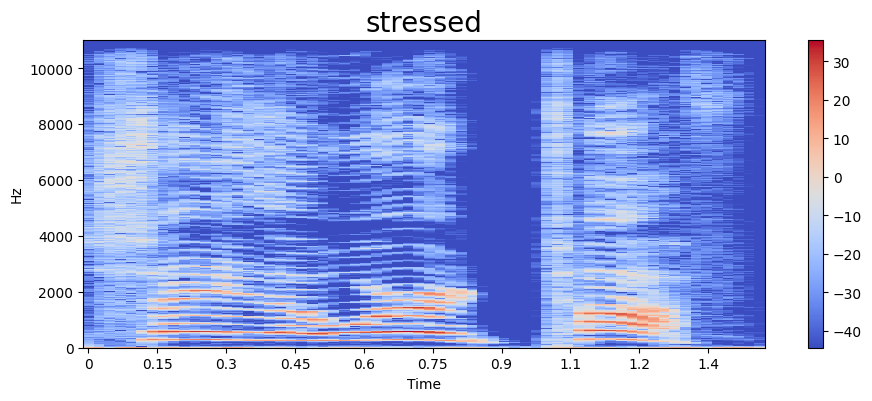

In [ ]:
emotion = 'stressed'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
#MFCC -mel-frequency cepstral co-efficient
#a feature representation commonly used in speech and music processing. It is a set of coefficients that represent the spectral envelope of a sound.
#The spectral envelope is a representation of how the energy of a sound is distributed across different frequencies.

#y==>This is a numpy array representing the audio signal.
#sr==>This is an integer representing the sample rate of the audio signal
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
extract_mfcc(df['speech'][0])

array([-4.0959058e+02,  6.5901382e+01, -6.9181061e+00, -2.2900248e+01,
       -2.1262891e+00,  1.7696662e+00, -1.2136867e+01,  3.1145642e+00,
       -1.2088268e+01, -3.3865914e-01, -9.2535305e+00,  6.4716840e+00,
       -4.7426443e+00,  4.3428631e+00, -7.6675458e+00,  9.0704310e-01,
       -4.6310061e-01, -4.2203479e+00, -2.0108743e+00, -1.0894774e+01,
       -5.9735742e+00,  8.6524963e+00,  2.1286302e+00,  1.7148533e+01,
        2.7564671e+01,  2.0897976e+01,  1.5601433e+01,  1.5583449e+01,
       -2.2294858e+00,  7.4107528e+00,  5.5105028e+00,  6.3542533e+00,
        2.6129844e+00, -1.0336398e+00,  1.9717348e-01,  4.9041166e+00,
        3.6140206e+00,  3.8324909e+00, -2.9541936e+00, -1.9245619e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc


0       [-409.59058, 65.90138, -6.918106, -22.900248, ...
1       [-418.51593, 97.63156, -2.5991485, -11.055726,...
2       [-447.35535, 65.21188, -5.5304275, -4.9365172,...
3       [-421.6649, 102.702255, 10.90602, -31.783535, ...
4       [-444.0869, 91.0951, -21.660238, -20.3425, 1.7...
                              ...                        
2795    [-448.51297, 98.16754, 17.327938, -1.6703792, ...
2796    [-408.65308, 85.30132, 14.952246, -8.535049, -...
2797    [-486.79715, 122.88256, 10.38301, -14.665894, ...
2798    [-387.67166, 85.84537, -18.815392, -4.124742, ...
2799    [-486.9698, 151.24261, 2.6622336, -37.884678, ...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

LSTM


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
#return_sequences=False indicates that the LSTM layer should return only the output of the last time step, rather than the full sequence.
#input_shape=(40,1)==>the input sequences have a length of 40 time steps and each time step has one feature.
#Dropout - used to avoid overfitting ,it drops some portion of units during training phase
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])


#optimizer -  updating the weights of the neural network,
#how the model learns and converges during training by adjusting the weights in the direction that minimizes the loss

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
24/24 [==============================] - 8s 236ms/step - loss: 0.5918 - accuracy: 0.6747 - val_loss: 0.4070 - val_accuracy: 0.7527
Epoch 2/10
24/24 [==============================] - 3s 143ms/step - loss: 0.2301 - accuracy: 0.9080 - val_loss: 0.1451 - val_accuracy: 0.9441
Epoch 3/10
24/24 [==============================] - 3s 144ms/step - loss: 0.1111 - accuracy: 0.9620 - val_loss: 0.1611 - val_accuracy: 0.9415
Epoch 4/10
24/24 [==============================] - 4s 171ms/step - loss: 0.1061 - accuracy: 0.9640 - val_loss: 0.0483 - val_accuracy: 0.9814
Epoch 5/10
24/24 [==============================] - 4s 180ms/step - loss: 0.0773 - accuracy: 0.9753 - val_loss: 0.0831 - val_accuracy: 0.9761
Epoch 6/10
24/24 [==============================] - 3s 144ms/step - loss: 0.0469 - accuracy: 0.9840 - val_loss: 0.0804 - val_accuracy: 0.9761
Epoch 7/10
24/24 [==============================] - 3s 144ms/step - loss: 0.0568 - accuracy: 0.9787 - val_loss: 0.0213 - val_accuracy: 0.9947
Epoch 

In [ ]:
from sklearn.metrics import classification_report
preds = model.predict(X_test, batch_size=16, verbose=1)
y_pred = np.argmax(preds, axis=1)  # Convert probabilities to class labels

y_test=np.argmax(y_test,axis=1)

report = classification_report(y_test, y_pred)

print(report)

58/58 [==============================] - 2s 19ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       387
           1       1.00      0.96      0.98       537

    accuracy                           0.97       924
   macro avg       0.97      0.98      0.97       924
weighted avg       0.98      0.97      0.97       924



In [ ]:
model.evaluate(X_test, y_test, 1000)
## accuracy is 98% for LSTM

In [ ]:
preds1=preds.argmax(axis=1)
preds = np.array(preds1)
mapped_array_2 = preds.astype(str)
mapped_array_2[mapped_array_2 == '0'] = 'stressed'
mapped_array_2[mapped_array_2 == '1'] = 'not stressed'

In [ ]:
actual = np.array(y_test)
actual1=actual.argmax(axis=1)

In [ ]:
mapped_array_3 = actual1.astype(str)
mapped_array_3[mapped_array_3 == '0'] = 'stressed'
mapped_array_3[mapped_array_3 == '1'] = 'not stressed'


In [ ]:
preddf = pd.DataFrame({'predictedvalues': mapped_array_2})
actualdf = pd.DataFrame({'actualvalues': mapped_array_3})

In [ ]:
finaldf = actualdf.join(preddf)
finaldf

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


model1 = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1), padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(512, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')

])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()


In [ ]:
history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

In [ ]:
from sklearn.metrics import classification_report
preds_cnn = model1.predict(X_test, batch_size=16, verbose=1)
y_pred = np.argmax(preds_cnn, axis=1)  # Convert probabilities to class labels



report = classification_report(y_test, y_pred)

print(report)
preds_cnn

In [ ]:
model1.evaluate(X_test, y_test, 1000)
#accuracy is 99% for CNN

In [ ]:
model1_accuracy = [0.80,0.94,0.96,0.98,0.98,0.97,0.98,0.98,0.99,0.99]
model2_accuracy = [0.63,0.92,0.96,0.98,0.99,0.97,0.98,0.99,0.99,0.98]

epochs = [1,2,3,4,5,6,7,8,9,10]
bar_width = 0.35

r1 = np.arange(len(epochs))
r2 = [x + bar_width for x in r1]

plt.bar(r1, model1_accuracy, color='b', width=bar_width, edgecolor='grey', label='Model 1')
plt.bar(r2, model2_accuracy, color='g', width=bar_width, edgecolor='grey', label='Model 2')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Two Models')
plt.xticks([r + bar_width/2 for r in range(len(epochs))], epochs)
